# Проект по SQL

Я являюсь аналитиком кампании, решившей заняться сервисом по предоставлению чтения книг по подписки.

У меня есть доступ к базе данных данного сервиса и моя задача проанализировать её.

В базе хранится информация о книгах, издательствах, авторах, а также пользовательские обзоры книг.

## Описание данных

В БД хранятся следующие таблице

**Таблица** `books` cодержит данные о книгах:
+ `book_id` — идентификатор книги;
+ `author_id` — идентификатор автора;
+ `title` — название книги;
+ `num_pages` — количество страниц;
+ `publication_date` — дата публикации книги;
+ `publisher_id` — идентификатор издателя.

**Таблица** `authors` содержит информацию об авторах:
+ `author_id` — идентификатор автора;
+ `author` — имя автора.

**Таблица** `publishers` содержит данные об издательствах:
+ `publisher_id` — идентификатор издательства;
+ `publisher` — название издательства;

**Таблица** `ratings` cодержит данные о пользовательских оценках книг:
+ `rating_id` — идентификатор оценки;
+ `book_id` — идентификатор книги;
+ `username` — имя пользователя, оставившего оценку;
+ `rating` — оценка книги.

**Таблица** `reviews` cодержит данные о пользовательских обзорах:

+ `review_id` — идентификатор обзора;
+ `book_id` — идентификатор книги;
+ `username` — имя автора обзора;
+ `text` — текст обзора.

### Схема данных

![Alt Text](https://pictures.s3.yandex.net/resources/scheme_1589269096.png)


## Цели исследования

Благодаря тому, что будет изучена база данных - какие книги и издательства представлены, какой у продуктов рейтинг, что ранее выбирали пользователи и т.п., кампания сможет выстроить адекватную дорожную карту по развитию сервиса и получении прибыли.

## Предобработка данных



In [11]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
from sqlalchemy import text, create_engine
import matplotlib.pyplot as plt
import math

In [12]:
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})


In [13]:
def execute_sql_query(table_name, engine):
    query = f"SELECT * FROM {table_name} "
    with engine.connect() as con:
        result = pd.read_sql(sql=text(query), con=con)
    return result

def explore(dataset):
    display(dataset.head())
    dataset.info()
    
def find_duplicates(dataset):
    print()
    duplicates = dataset[dataset.duplicated(keep=False)]
    if duplicates.empty:
        print("Дубликаты строк не найдены.")
    else:
        print("Найдены дубликаты строк:")
        display(duplicates)    

In [14]:
books = execute_sql_query('books', engine)
explore(books)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [15]:
books['publication_date'] = pd.to_datetime(books['publication_date'])
explore(books)
find_duplicates(books)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   book_id           1000 non-null   int64         
 1   author_id         1000 non-null   int64         
 2   title             1000 non-null   object        
 3   num_pages         1000 non-null   int64         
 4   publication_date  1000 non-null   datetime64[ns]
 5   publisher_id      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 47.0+ KB

Дубликаты строк не найдены.


В таблице `books` правильно обозначены столбцы, изменен формат столбца с датой публикации, дубликаты не найдены.

In [16]:
authors = execute_sql_query('authors', engine)
explore(authors)
find_duplicates(authors)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB

Дубликаты строк не найдены.


В таблице `authors` правильно обозначены столбцы, дубликаты не найдены.

In [17]:
publishers = execute_sql_query('publishers', engine)
explore(publishers)
find_duplicates(publishers)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB

Дубликаты строк не найдены.


В таблице `publishers` правильно обозначены столбцы, дубликаты не найдены.

In [18]:
ratings = execute_sql_query('ratings', engine)
explore(ratings)
find_duplicates(ratings)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB

Дубликаты строк не найдены.


В таблице `ratings` правильно обозначены столбцы, дубликаты не найдены.

In [19]:
reviews = execute_sql_query('reviews', engine)
explore(reviews)
find_duplicates(reviews)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB

Дубликаты строк не найдены.


В таблице `ratings` правильно обозначены столбцы, дубликаты не найдены.

### Вывод

Все данные корректны, приведены к нужному типу, дубликаты не найдены, можно присутпать к анализу 

## Исследование данных

Компания для проработки плана составила список вопросов:
+ Посчитайте, сколько книг вышло после 1 января 2000 года;
+ Для каждой книги посчитайте количество обзоров и среднюю оценку;
+ Определите издательство, которое выпустило наибольшее число книг толще 50 страниц (для исключения брошюр);
+ Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;
+ Посчитайте среднее количество обзоров от пользователей, которые поставили больше 48 оценок.


Сколько книг вышло после 1 января 2000 года

In [20]:
query = """
    SELECT COUNT(*) AS books_after_2000
    FROM books
    WHERE publication_date > '2000-01-01'
    """
result = pd.io.sql.read_sql(sql=query, con=engine)
display(result)
print()
print('В сервисе присутствует', result.iloc[0, 0], 'книг, вышедших с 2000 года')

,books_after_2000
0,819



В сервисе присутствует 819 книг, вышедших с 2000 года


Для каждой книги посчитайте количество обзоров и среднюю оценку;

In [21]:
query = """
    SELECT 
    b.book_id,
    b.title,
    COUNT(DISTINCT re.review_id) AS num_reviews,
    AVG(ra.rating) AS average_rating
FROM
    books AS b
LEFT JOIN
    reviews AS re ON b.book_id = re.book_id
LEFT JOIN
    ratings AS ra ON b.book_id = ra.book_id
GROUP BY
    b.book_id

    """
result = pd.io.sql.read_sql(sql=query, con=engine)
display(result)

,book_id,title,num_reviews,average_rating
0,1,'Salem's Lot,2,3.666667
1,2,1 000 Places to See Before You Die,1,2.500000
2,3,13 Little Blue Envelopes (Little Blue Envelope...,3,4.666667
3,4,1491: New Revelations of the Americas Before C...,2,4.500000
4,5,1776,4,4.000000
...,...,...,...,...
995,996,Wyrd Sisters (Discworld #6; Witches #2),3,3.666667
996,997,Xenocide (Ender's Saga #3),3,3.400000
997,998,Year of Wonders,4,3.200000
998,999,You Suck (A Love Story #2),2,4.500000


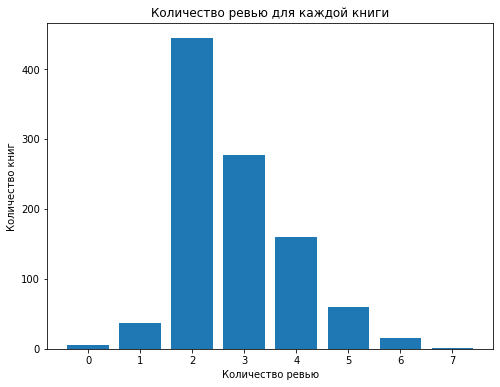

In [23]:
grouped_reviews = result['num_reviews'].value_counts()
plt.figure(figsize = (8,6))
plt.bar(grouped_reviews.index, grouped_reviews.values)
plt.xlabel('Количество ревью')
plt.ylabel('Количество книг')
plt.title('Количество ревью для каждой книги')
plt.show()

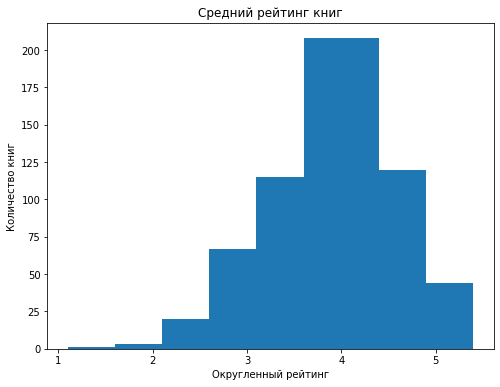

In [24]:
grouped_ratings = result['average_rating'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(grouped_ratings.index, grouped_ratings.values)
plt.xlabel('Округленный рейтинг')
plt.ylabel('Количество книг')
plt.title('Средний рейтинг книг')
plt.show()

Определите издательство, которое выпустило наибольшее число книг толще 50 страниц 

In [26]:
query = """SELECT p.publisher_id, p.publisher, COUNT(*) AS num_books
    FROM books AS b
    JOIN publishers AS p ON b.publisher_id = p.publisher_id
    WHERE b.num_pages > 50
    GROUP BY p.publisher_id, p.publisher
    ORDER BY num_books DESC
    LIMIT 1;

    """
result = pd.io.sql.read_sql(sql=query, con=engine)
display(result)
print()
print('Издетельство с наибольшем количеством изданий - ', result.iloc[0, 1])

,publisher_id,publisher,num_books
0,212,Penguin Books,42



Издетельство с наибольшем количеством изданий -  Penguin Books


Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками

In [27]:
query = """SELECT a.author_id, a.author, AVG(r.rating) AS average_rating
    FROM authors AS a
    JOIN books AS b ON a.author_id = b.author_id
    JOIN ratings AS r ON b.book_id = r.book_id
    WHERE b.book_id IN (
        SELECT book_id
        FROM ratings
        GROUP BY book_id
        HAVING COUNT(*) >= 50
        )
    GROUP BY a.author_id, a.author
    ORDER BY average_rating DESC
    LIMIT 1;
    """
result = pd.io.sql.read_sql(sql=query, con=engine)
display(result)
print()
print('Автор с наибольшим рейтингом - ', result.iloc[0, 1])

,author_id,author,average_rating
0,236,J.K. Rowling/Mary GrandPré,4.287097



Автор с наибольшим рейтингом -  J.K. Rowling/Mary GrandPré


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " > <b>Комментарии от ревьюера ✔️ : </b>

И здесь ты не ошибся. Ты верно отфильтровал книги и рассчитал средний рейтинг авторов

</div>

In [28]:
query = """SELECT AVG(num_reviews) AS average_reviews
    FROM (
        SELECT username, COUNT(*) AS num_reviews
        FROM reviews
            WHERE username IN (
                SELECT username
                FROM ratings
                GROUP BY username
                HAVING COUNT(*) > 48
                )
        GROUP BY username
        ) AS subquery;
    """
result = pd.io.sql.read_sql(sql=query, con=engine)
display(result)
print()
print('Cреднее количество обзоров от пользователей, которые поставили больше 48 оценок - ', result.iloc[0, 0])

,average_reviews
0,24.0



Cреднее количество обзоров от пользователей, которые поставили больше 48 оценок -  24.0


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " > <b>Комментарии от ревьюера ✔️ : </b>

И это .. правильный ответ! Ты корректно отобрал пользователей и рассчитал их показатели.

В итоге, 5\5 с первой попытки - это сильный результат)

</div>

### Выводы
1. В сервисе присутствует 819 книг, вышедших с 2000 года. Учитывая, что в самой базе находится всего 1000 книг, можно сказать, что больше 80% относятся к современной литературе. 
2. В среднем на книгу приходится от двух до четырех полноценных обзоров, что является отличным результатом. Значительная часть Кинг имеет рейтинг от 4 и до 5.
3. Издательство с наибольшем количеством изданий -  Penguin Books
4. Автор с наибольшим рейтингом -  J.K. Rowling/Mary GrandPré
5. Среднее количество обзоров от пользователей, которые поставили больше 48 оценок -  24.0


## Итог исследования
Можно разделить итог на 2 составляющие - книги и пользователи.

Относительно книг, отмечу, что для подобного сервиса их крайне мало и кампании требуется срочно найти доступ к большему количеству литературы. Значительная часть книг имеет хорошие рейтинги пользователей, но количество обзоров на книгу не очень большое.

Пользователи достаточно активны, они часто ставят оценку книгам, но пишут мало обзоров. 

Как итог для развития сервиса в первую очередь необходимо увеличить количество книг и мотивировать пользователей оставлять больше ОС по книгам. 

Как вариант, можно рассмотреть переформатирование площадки для возможности пользователям самим выкладывать свои собственные произведения и продавать их, а сервис будет получать комиссию.
